<H2 align="center">75.06/95.58 Organización de Datos</H2>
<H2 align="center">Primer Cuatrimestre de 2019</H2>
<H2 align="center">Trabajo Práctico 1: Enunciado</H2>

<br>

Para esta primera entrega del TP, realizaremos el análisis exploratorio del set de datos provisto por la empresa Jampp. 

Los datos a analizar estan disponibles en https://drive.google.com/drive/folders/1-7ACCWhS3sWVh0vU273YwbS74WmzEhLa?usp=sharing

En el directorio podemos encontrar:
<ul>
<li>installs</li> 
<li>clicks</li> 
<li>events</li>
<li>auctions</li>
</ul>
 
El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:
<ul>
- El análisis debe estar hecho en Python Pandas o R.
</ul>
<ul>
- El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
</ul>
<ul>
- Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
</ul>
<ul>
- Agregar en Kaggle un kernel con el análisis exploratorio realizado (deseable pero no mandatorio)
</ul>

La evaluación del TP se realizará en base al siguiente criterio:

<ul>
- Originalidad del análisis exploratorio. 
</ul>
<ul>
- Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
</ul>
<ul>
- Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
</ul>
<ul>
- Calidad de las visualizaciones presentadas.
</ul>
<ul>
<ul>    
-  ¿Tienen todos los ejes su rótulo?
</ul>    
</ul>
<ul>
<ul> 
-  ¿Tiene cada visualización un título?
</ul>
</ul>
<ul>
<ul> 
-  ¿Es entendible la visualización sin tener que leer la explicación?
</ul>
</ul>
<ul>
<ul> 
-  ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
</ul>
</ul>
<ul>
<ul> 
-  ¿Es una visualización interesante?
</ul>
</ul>
<ul>
<ul> 
-  ¿El uso del color es adecuado?
</ul>
</ul>
<ul>
<ul>     
-  ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
</ul>
</ul>
<ul>
<ul> 
-  ¿La visualización es consistente con los datos?
</ul>
</ul>
<ul>
- Conclusiones presentadas.
</ul>
<ul>
<ul>
-  ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante?
</ul>
</ul>
<ul>
<ul>
-  ¿Identificaron patrones o funnels de usuarios?
</ul>
</ul>
<ul>
<ul>
-  ¿El análisis realiza un aporte a Jampp?
</ul>
</ul>

El grupo que realice el mejor análisis exploratorio obtendrá 10 puntos para cada uno de sus integrantes que podrán ser usados en el parcial además de ser publicado en el repositorio de la materia como ejemplo para los siguientes cuatrimestres.

Como dato a tener en cuenta, para el TP2 se trabajará con estos mismos datos intentando determinar:
<ul>
<ul>
-  En un instante dado, estimar 𝑆𝑡(𝑑) el tiempo hasta que un dispositivo 𝑑 aparezca de vuelta en una subasta RTB
</ul>
</ul>

<ul>
<ul>
-  En un instante dado, estimar 𝑆𝑐(𝑑) el tiempo hasta que un dispositivo 𝑑 convierta
</ul>
</ul>


La idea del TP1 es obtener información que facilite luego plantear una solución para el TP2.

<b>Glosario</b>
<ul>
<ul>
- Convertir: el objetivo de mostrar publicidad es que un dispositivo instale una aplicación, a ese evento se le llama conversión.
</ul>
</ul>
<ul>
<ul>
- Dispositivo: entidad con un id de publicidad asociado. Por ejemplo: un celular Samsung J6 con Android tiene un id único, un Apple iPhone tiene un identificador único.
</ul>
</ul>
<ul>
<ul>
- Evento: cualquier tipo de acción categorizada dentro de una aplicación. Por ejemplo, en una aplicación de e-commerce un funnel de eventos muy común puede ser del estilo “abrir_app” → “buscar_producto” → “revisar_catalogo” → “agregar_a_carrito” → “efectuar_compra”. Cada uno de estos pasos es un evento.
</ul>
</ul>
<ul>
<ul>
- Subasta: en el momento que una aplicación quiere mostrar una publicidad, ese espacio se vende en una subasta (generalmente de segundo precio) donde todos los interesados en mostrar una publicidad ofertan un precio y gana quién más ofrece.
</ul>
</ul>
<br><br><br>

In [1]:
##-----------------------------------------------------------------------------------##
## Importacion general de librerias y de visualizacion (matplotlib y seaborn)        ##
##-----------------------------------------------------------------------------------##

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##-----------------------------------------------------------------------------------##
##       Cargamos los archivos que nos proveen para analizar                         ##
##-----------------------------------------------------------------------------------##

df_clicks= pd.read_csv('clicks.csv'); 
df_events= pd.read_csv('events.csv',low_memory=False); 
df_installs= pd.read_csv('installs.csv'); 
df_auctions= pd.read_csv('auctions.csv'); 

In [61]:
##-----------------------------------------------------------------------------------##
##  Vemos la cantidad de registros y columnas que tiene cada dataset                 ##
##-----------------------------------------------------------------------------------##
df_clicks.shape

(26351, 20)

In [62]:
df_events.shape

(2494423, 22)

In [63]:
df_installs.shape

(3412, 19)

In [64]:
df_auctions.shape

(19571319, 7)

<H1 align="center">Dataset clicks</H1><br>

In [65]:
##-----------------------------------------------------------------------------------##
## Visualizamos los primeros registros del dataset Clicks.csv y                      ##
## contabilizamos los valores que tiene cada columna                                 ##
##-----------------------------------------------------------------------------------##

df_clicks.head(3)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647


In [66]:
df_clicks.count()

advertiser_id      26351
action_id              0
source_id          26351
created            26351
country_code       26351
latitude           26351
longitude          26351
wifi_connection    26351
carrier_id         26340
trans_id           26351
os_minor           26339
agent_device        3243
os_major           26339
specs_brand        26351
brand               6235
timeToClick        22977
touchX             23011
touchY             23011
ref_type           26351
ref_hash           26351
dtype: int64

In [67]:
df_clicks.action_id.isnull().value_counts()


True    26351
Name: action_id, dtype: int64

In [68]:
df_clicks.country_code.value_counts()


6333597102633388268    26351
Name: country_code, dtype: int64

In [69]:
df_clicks.wifi_connection.value_counts()

False    26351
Name: wifi_connection, dtype: int64

In [70]:
df_clicks.brand.isnull().value_counts()

True     20116
False     6235
Name: brand, dtype: int64

In [71]:
df_clicks.timeToClick.isnull().value_counts()

False    22977
True      3374
Name: timeToClick, dtype: int64

In [72]:
df_clicks.touchX.isnull().value_counts()

False    23011
True      3340
Name: touchX, dtype: int64

In [73]:
df_clicks.touchY.isnull().value_counts()

False    23011
True      3340
Name: touchY, dtype: int64

A priori observamos lo siguiente: 
<ul>
<li>
action_id tiene todos los registros nulos, por lo que no nos aporta información para analizar.
</li>
<li>
country_code tiene solamente el código de un país, por lo que tampoco nos aporta algo en particular.
</li>
<li>    
brand tiene un 76% de valores nulos. No obstante, nos va a permitir ver una tendencia basado en las marcas por lo que lo utilizaremos en el análisis.
</li>
<li>
timeToClick tiene un 12,8% de valores nulos. Asumimos que estos valores nulos pueden deberse a problemas en la inserción del registro o bien problemas del sistema, por lo que no los tendremos en consideración para el análisis.
</li>
<li>
Tanto touchX como touchY tienen un 12,7% de valores nulos. Vamos a asumir lo mismo que en el punto anterior, y también los transformaremos en coordenadas 0,0.
</li>
</ul>

Con touchX y touchY haremos un gráfico de dispersión para ver cómo se distribuyen los clicks.

In [74]:
df_clicks.touchX = df_clicks.touchX.replace(np.NaN,0)
df_clicks.touchY = df_clicks.touchY.replace(np.NaN,0)

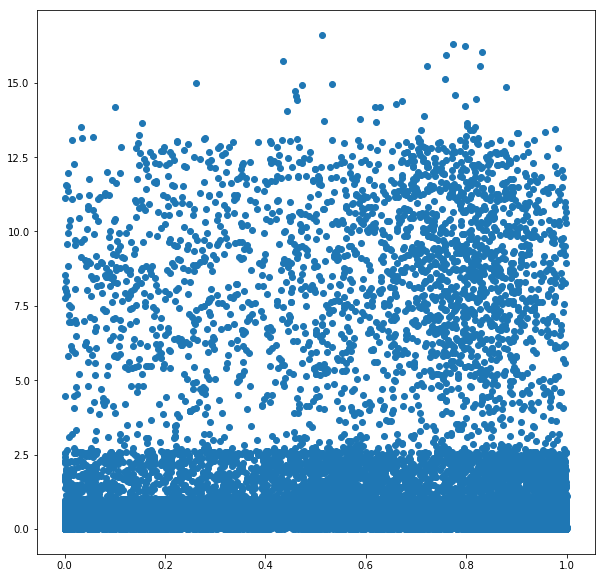

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(df_clicks.touchX, df_clicks.touchY)

En este caso observamos que la mayoría de los clicks se distribuyen en dos grupos:
<ul>
    <li>
X=(0, 1) e Y=(0, 2.5)
    </li>
    <li>
X=(0.7, 0.9) e Y=(5, 10)  
    </li>
</ul>

Utilizamos timeToClick para ver cuál es el tiempo promedio en el que se realiza un click

In [82]:
df_clicks.timeToClick.round().mean()

230.39417678548114

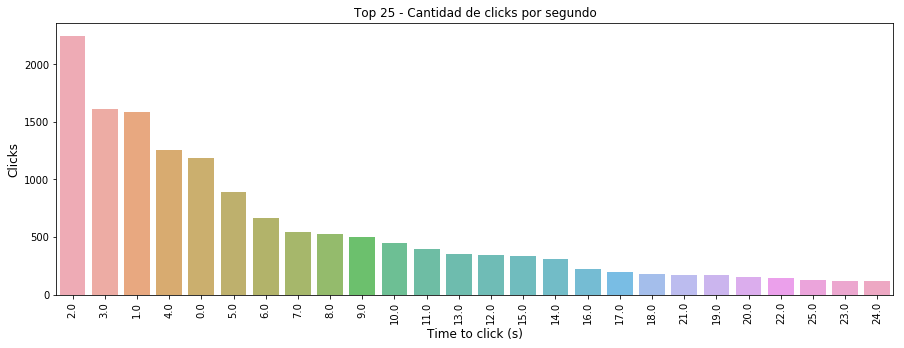

In [83]:
clicks_per_time = df_clicks.timeToClick.round().value_counts(sort=True).reset_index().sort_values(['timeToClick'], ascending=False)

clicks_per_time = clicks_per_time.loc[0:25,]
plt.figure(figsize=(15,5))
ax=sns.barplot(clicks_per_time.index, clicks_per_time.timeToClick, alpha=0.8)
ax.set_xticklabels(clicks_per_time['index'])
plt.title('Top 25 - Cantidad de clicks por segundo')
plt.ylabel('Clicks', fontsize=12)
plt.xlabel('Time to click (s)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [84]:
clicks_per_time

,index,timeToClick
0,2.0,2248
1,3.0,1610
2,1.0,1585
3,4.0,1254
4,0.0,1189
5,5.0,891
6,6.0,666
7,7.0,547
8,8.0,523
9,9.0,496


Si bien se observa que alrededor del 57% de la cantidad de clicks (13191 / 22977) se encuentran distribuidos en los primeros 15 segundos, hay varios clicks que se dan pasados varios minutos y hasta horas. Puede deberse a algún tipo de error que desconocemos o realmente sucede así. Nosotros decidimos tomarlos como válidos y en base a esto la media de tiempo hasta hacer click es de 3 minutos 20 segundos.

Analizamos la fecha de creación del click para ver cómo se distribuyen.

In [85]:
#Convertimos el campo de fecha de creación del click en tipo datetime.
df_clicks.created = pd.to_datetime(df_clicks.created)

In [86]:
#Obtenemos la cantidad de clicks que se realizaron por día.
df_clicks_por_dia = df_clicks.created\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

print(df_clicks_por_dia)

                        dia  cantidad
7 2019-03-05 00:00:00+00:00        31
8 2019-03-06 00:00:00+00:00        14
5 2019-03-07 00:00:00+00:00      2989
6 2019-03-08 00:00:00+00:00      2839
4 2019-03-09 00:00:00+00:00      3283
2 2019-03-10 00:00:00+00:00      3966
1 2019-03-11 00:00:00+00:00      4557
0 2019-03-12 00:00:00+00:00      5204
3 2019-03-13 00:00:00+00:00      3468


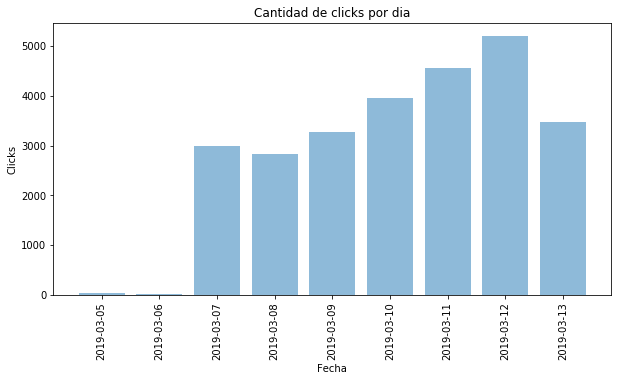

In [87]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(df_clicks_por_dia)), df_clicks_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_clicks_por_dia)), df_clicks_por_dia.dia.dt.date,rotation=90)
plt.ylabel('Clicks')
plt.xlabel('Fecha')
plt.title('Cantidad de clicks por dia')
 
plt.show()

Vamos a observar cómo se distribuyen los clicks dependiendo del Carrier y vemos el top 10

In [88]:
#Obtenemos la cantidad de clicks por carrier
clicks_by_carrier = df_clicks.carrier_id.value_counts(sort=True).reset_index().sort_values(['carrier_id'], ascending=False)
print(clicks_by_carrier.rename(columns = {'index':'carrier_id','carrier_id':'count'}))

    carrier_id  count
0          4.0   4569
1          6.0   3474
2          1.0   3307
3         13.0   2998
4          3.0   2944
5         12.0   2273
6          0.0   1368
7         10.0    753
8         14.0    588
9          9.0    555
10        17.0    519
11        19.0    496
12        18.0    468
13        22.0    462
14         2.0    264
15        15.0    263
16         5.0    212
17        21.0    211
18        25.0    202
19        30.0    121
20        24.0    117
21        27.0     58
22        29.0     33
23        67.0     13
24        33.0     12
26        26.0      6
27        45.0      6
25        76.0      6
29        28.0      3
30        31.0      3
28        91.0      3
35        37.0      2
39        55.0      2
38        39.0      2
36        11.0      2
37       115.0      2
34        65.0      2
33        59.0      2
32        93.0      2
31        48.0      2
47        80.0      1
53        34.0      1
52        69.0      1
51       106.0      1
50        

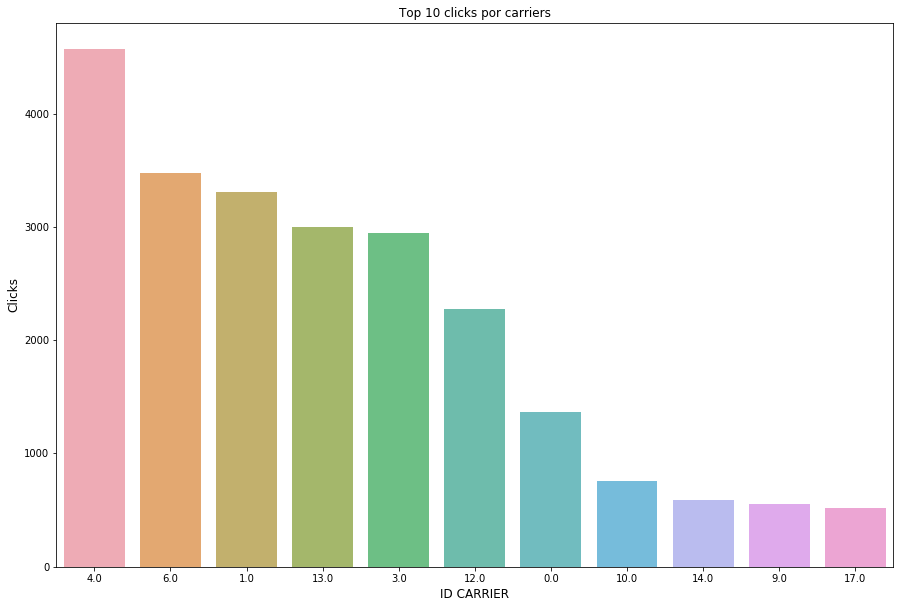

In [89]:
#Nos quedamos sólo con el top 10 de carriers en los cuales se realizaron más clicks.

clicks_by_carrier = clicks_by_carrier.loc[:10,]
plt.figure(figsize=(15,10))
ax=sns.barplot(clicks_by_carrier.index, clicks_by_carrier.carrier_id, alpha=0.8)
ax.set_xticklabels(clicks_by_carrier['index'])
plt.title('Top 10 clicks por carriers')
plt.ylabel('Clicks', fontsize=12)
plt.xlabel('ID CARRIER', fontsize=12)
plt.show()

De acá se desprende que los usuarios del Carrier "4" son los que más hacen clicks por encima de los demás Carriers.

Como dijimos antes, en el campo de marca tenemos más del 75% de campos nulos, pero podemos utilizar la info existente para mostrar, tendencialmente, cuáles son las marcas en las cuales se hacen más clicks.

In [90]:
clicks_by_brand = df_clicks.brand.value_counts(sort=True).reset_index().sort_values(['brand'], ascending=False)
print(clicks_by_brand.rename(columns = {'index':'brand','brand':'count'}))

    brand  count
0     2.0   2027
1     0.0   1917
2     1.0   1521
3     4.0    240
4     3.0    186
5     5.0    129
6     6.0    124
7     7.0     32
8     9.0     31
9     8.0     16
10   10.0      8
11   12.0      3
12   13.0      1


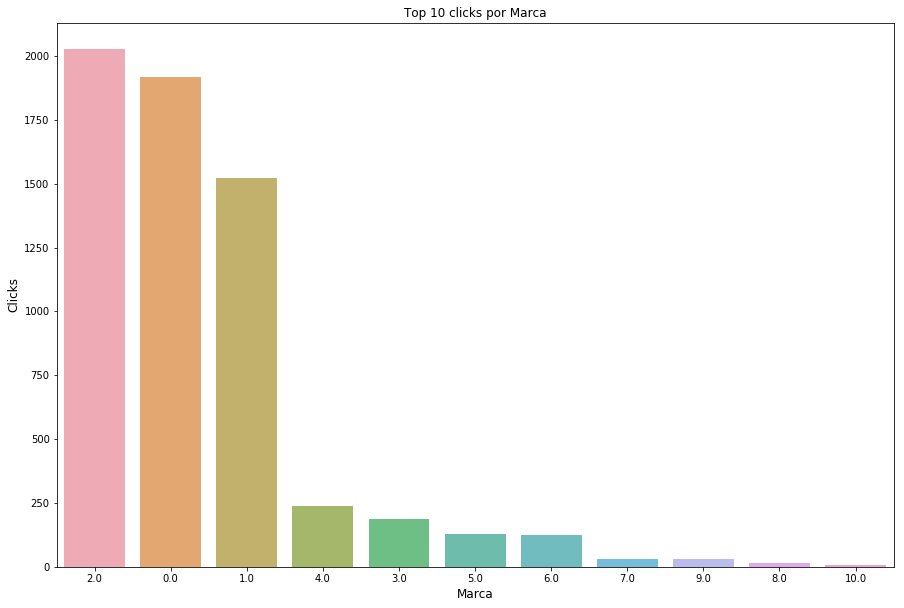

In [91]:
#Nos quedamos solo con el top 10 de marcas en las cuales se realizaron más clicks.

clicks_by_brand = clicks_by_brand.loc[:10,]
plt.figure(figsize=(15,10))
ax=sns.barplot(clicks_by_brand.index, clicks_by_brand.brand, alpha=0.8)
ax.set_xticklabels(clicks_by_brand['index'])
plt.title('Top 10 clicks por Marca')
plt.ylabel('Clicks', fontsize=12)
plt.xlabel('Marca', fontsize=12)
plt.show()

Se visualiza que en las marcas "2" y "0" es en donde más clicks se hacen.

   cliente  cantidad
1        0        70
4        1         2
2        2        12
0        3     26263
6        5         1
3        7         2
5        8         1


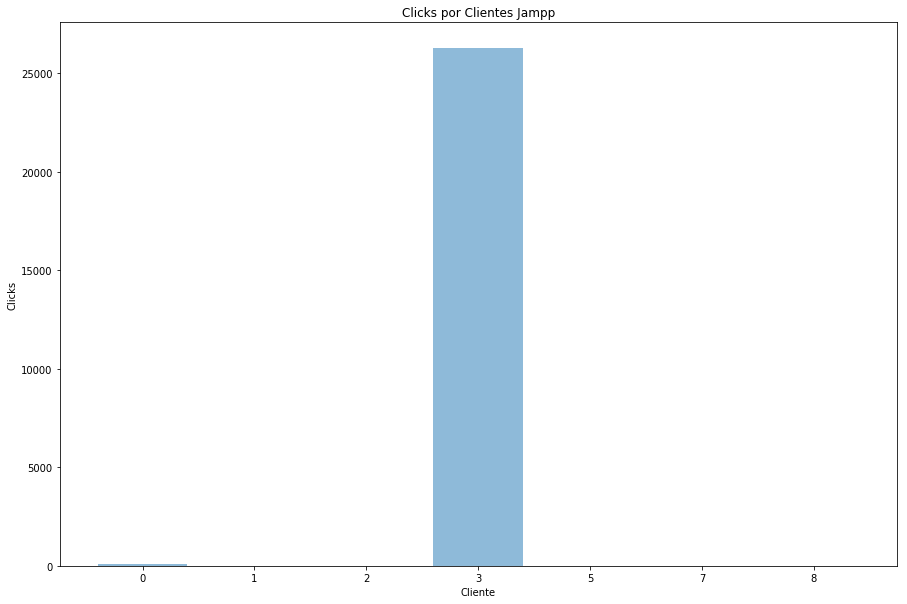

In [151]:
#Clicks por clientes

clicks_by_client = df_clicks.advertiser_id.value_counts().rename_axis('cliente')\
       .reset_index(name='cantidad')\
       .sort_values(by="cliente", ascending=True)

print(clicks_by_client)
plt.figure(figsize=(15,10))
plt.bar(np.arange(len(clicks_by_client)), clicks_by_client.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(clicks_by_client)), clicks_by_client.cliente)
plt.ylabel('Clicks')
plt.xlabel('Cliente')
plt.title('Clicks por Clientes Jampp')
 
plt.show()

Se ve que, por lejos, la aplicación 3 es la que recibe más clicks

<H1 align="center">Dataset events</H1><br>

In [92]:
##-----------------------------------------------------------------------------------##
## Visualizamos los primeros registros del dataset events.csv y                      ##
## contabilizamos los valores que tiene cada columna                                 ##
##-----------------------------------------------------------------------------------##
df_events.head(3)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17


In [93]:
df_events.count()

date                  2494423
event_id              2494423
ref_type              2494423
ref_hash              2494423
application_id        2494423
attributed            2494423
device_countrycode    2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
trans_id                   82
user_agent            1391527
event_uuid            2489324
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [94]:
df_events.trans_id.isnull().value_counts()

True     2494341
False         82
Name: trans_id, dtype: int64

In [95]:
df_events.device_os_version.isnull().value_counts()

True     1472357
False    1022066
Name: device_os_version, dtype: int64

In [96]:
df_events.device_brand.isnull().value_counts()

True     1329460
False    1164963
Name: device_brand, dtype: int64

In [97]:
df_events.carrier.isnull().value_counts()

True     1877989
False     616434
Name: carrier, dtype: int64

In [98]:
df_events.connection_type.isnull().value_counts()

True     1881960
False     612463
Name: connection_type, dtype: int64

In [99]:
df_events.connection_type.value_counts()

Cable/DSL    331948
Cellular     280511
Corporate         4
Name: connection_type, dtype: int64

In [100]:
df_events.wifi.isnull().value_counts()

False    1378872
True     1115551
Name: wifi, dtype: int64

In [101]:
df_events.wifi.value_counts()

True     930902
False    447970
Name: wifi, dtype: int64

In [102]:
df_events.attributed.value_counts()

False    2489324
True        5099
Name: attributed, dtype: int64

In [103]:
df_events.device_countrycode.value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

A priori observamos lo siguiente: 
<ul>
<li>
trans_id tiene solamente 82 registros no nulos de un total de 2494423, por lo que no nos aporta información útil.
</li>
<li>
Wifi tiene el 44% de los valores nulos. Del 56% restante,el 67,5% indica que el evento se realizó con una conexión wifi.
</li>
<li>
connection_type tiene un 75,5% de valores nulos, pero con el resto de los datos, podemos ver que hay tres tipos de conexiones.
</li>
<li>
Con brand_device y device_os_version tenemos más de la mitad de los registros sin valor (53% y 59% respectivamente). 
</li>
<li>
Con device_countrycode, podemos observar que solamente tenemos datos de un único país, por lo que lo descartaremos para los análisis.
</li>
<li>
Con el campo attributed vemos que solamente el 0.20% corresponden a eventos que son atribuídos a Jampp.
</li>
</ul>

In [104]:
app_for_events = df_events.application_id.value_counts(sort=True).reset_index().sort_values(['application_id'],ascending=False)

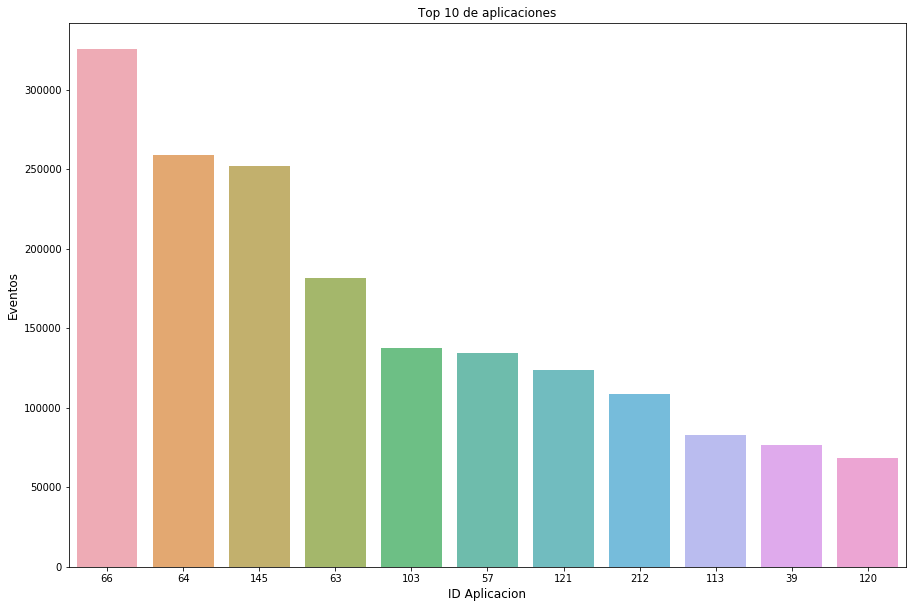

In [105]:
#Nos quedamos con el top 10 de aplicaciones en las cuales se realizaron más eventos.
app_for_events = app_for_events.loc[:10,]
plt.figure(figsize=(15,10))
ax=sns.barplot(app_for_events.index, app_for_events.application_id, alpha=0.8)
ax.set_xticklabels(app_for_events['index'])
plt.title('Top 10 de aplicaciones')
plt.ylabel('Eventos', fontsize=12)
plt.xlabel('ID Aplicacion', fontsize=12)
plt.show()

In [106]:
app_for_events

,index,application_id
0,66,325696
1,64,259084
2,145,252431
3,63,181555
4,103,137513
5,57,134498
6,121,123711
7,212,108489
8,113,82962
9,39,76448


Observamos que la mayoría de los eventos ocurren en las aplicaciones 66 64 y 115.

         dia  cantidad
8 2019-03-05    240549
7 2019-03-06    253505
6 2019-03-07    253706
4 2019-03-08    285535
3 2019-03-09    286221
2 2019-03-10    293091
5 2019-03-11    268884
1 2019-03-12    296665
0 2019-03-13    316267


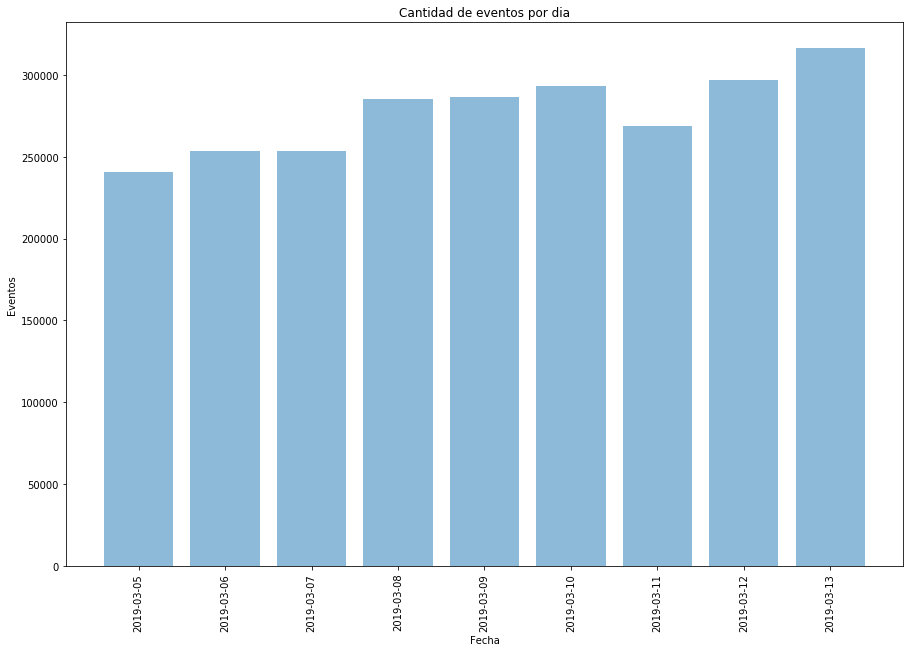

In [110]:
#Convertimos la fecha de creación del evento a un tipo datetime.
df_events.date = pd.to_datetime(df_events.date)

#Obtenemos la cantidad de eventos por día.
df_eventos_por_dia = df_events.date\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

print(df_eventos_por_dia)
plt.figure(figsize=(15,10))
plt.bar(np.arange(len(df_eventos_por_dia)), df_eventos_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_eventos_por_dia)), df_eventos_por_dia.dia.dt.date,rotation=90)
plt.ylabel('Eventos')
plt.xlabel('Fecha')
plt.title('Cantidad de eventos por dia')
 
plt.show()

Se puede ver que la cantidad de eventos se mantiene constante a lo largo de la semana, sin picos particulares durante el fin de semana.

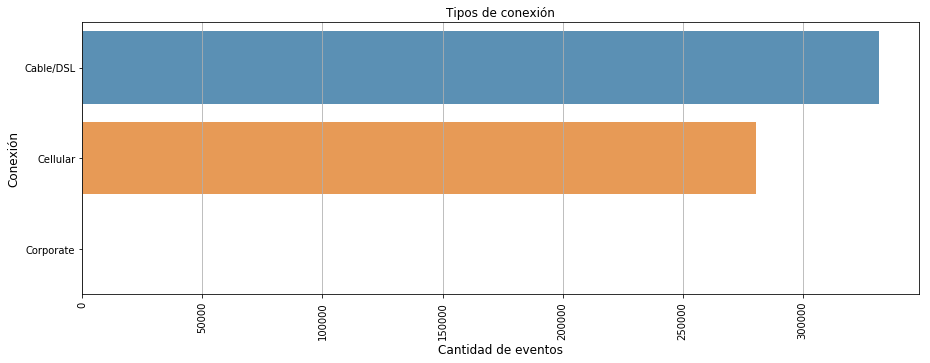

In [111]:
#Obtenemos la cantidad de eventos que se realizaron con cada tipo de conexión.

events_by_connection_type = df_events.connection_type.value_counts(sort=True)\
       .rename_axis('conexion')\
       .reset_index(name='cantidad')\
       .sort_values(by='conexion', ascending=True)

plt.figure(figsize=(15,5))
ax=sns.barplot(events_by_connection_type.cantidad, events_by_connection_type.conexion, alpha=0.8, orient='h')
ax.set_yticklabels(events_by_connection_type['conexion'])
ax.grid(axis='x')
plt.title('Tipos de conexión')
plt.ylabel('Conexión', fontsize=12)
plt.xlabel('Cantidad de eventos', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [112]:
events_by_connection_type

,conexion,cantidad
0,Cable/DSL,331948
1,Cellular,280511
2,Corporate,4


Algo que podemos destacar de los eventos es que se realizan varios por un mismo equipo, conexión o IP. Intentaremos identificar cuáles son las IPs que más eventos realizaron.

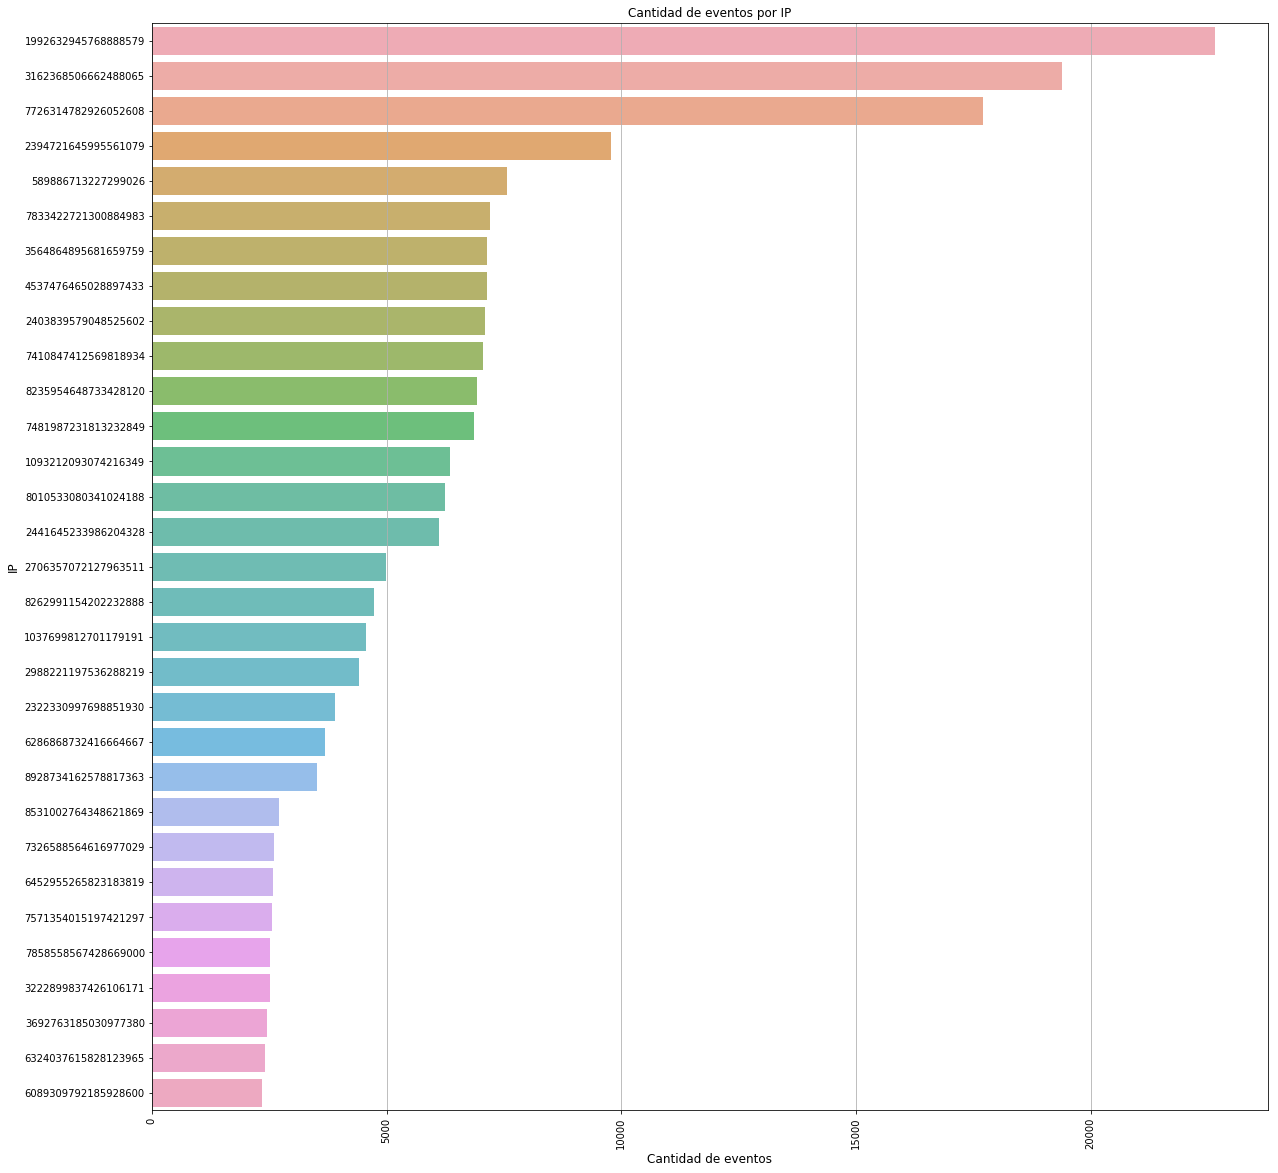

In [113]:
#Obtenemos el top 30 de cantidad de eventos por IP
events_by_ip_address = df_events.ip_address.value_counts(sort=True)\
       .reset_index()\
       .sort_values(['ip_address'], ascending=False)

events_by_ip_address = events_by_ip_address.loc[:30,]

plt.figure(figsize=(20,20))
ax=sns.barplot(events_by_ip_address.ip_address, events_by_ip_address.index, alpha=0.8, orient='h')
ax.set_yticklabels(events_by_ip_address['index'])
ax.grid(axis='x')
plt.title('Cantidad de eventos por IP')
plt.ylabel('IP', fontsize=12)
plt.xlabel('Cantidad de eventos', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [114]:
 events_by_ip_address

,index,ip_address
0,1992632945768888579,22640
1,3162368506662488065,19379
2,7726314782926052608,17704
3,2394721645995561079,9777
4,589886713227299026,7561
5,7833422721300884983,7197
6,3564864895681659759,7142
7,4537476465028897433,7140
8,2403839579048525602,7100
9,7410847412569818934,7065


<H1 align="center">Dataset Installs</H1><br>

In [115]:
##-----------------------------------------------------------------------------------##
## Visualizamos los primeros registros del dataset installs.csv y                    ##
## contabilizamos los valores que tiene cada columna                                 ##
##-----------------------------------------------------------------------------------##
df_installs.head(3)

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,hour
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,1
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,4
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18,4


In [116]:
df_installs.count()

created               3412
application_id        3412
ref_type              3412
ref_hash              3412
click_hash               0
attributed            3412
implicit              3412
device_countrycode    3412
device_brand          1047
device_model          3411
session_user_agent    3364
user_agent            1729
event_uuid             865
kind                   865
wifi                  1729
trans_id                 6
ip_address            3412
device_language       3378
hour                  3412
dtype: int64

In [117]:
df_installs.device_countrycode.value_counts()

6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64

In [118]:
df_installs.wifi.value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [119]:
df_installs.attributed.value_counts()

False    3412
Name: attributed, dtype: int64

In [120]:
df_installs.device_model.isnull().value_counts()

False    3411
True        1
Name: device_model, dtype: int64

In [121]:
df_installs.device_brand.isnull().value_counts()

True     2365
False    1047
Name: device_brand, dtype: int64

Podemos observamos lo siguiente: 
<ul>
<li>
Las instalaciones se realizaron en dos países diferentes.
</li>
<li>
El 40% de las instalaciones se realizaron con una conexión a una red wifi.
</li>
<li>    
Ninguna instalación fue atribuida a Jampp.
</li>
<li>
Sólo existe un registro sin valor de modelo, por lo que podremos analizar los modelos en los que se realizan la mayor cantidad de instalaciones.
</li>
<li>
Sòlo un tercio de los registros tienen datos acerca de las marcas de los dispositivos.
</li>
</ul>

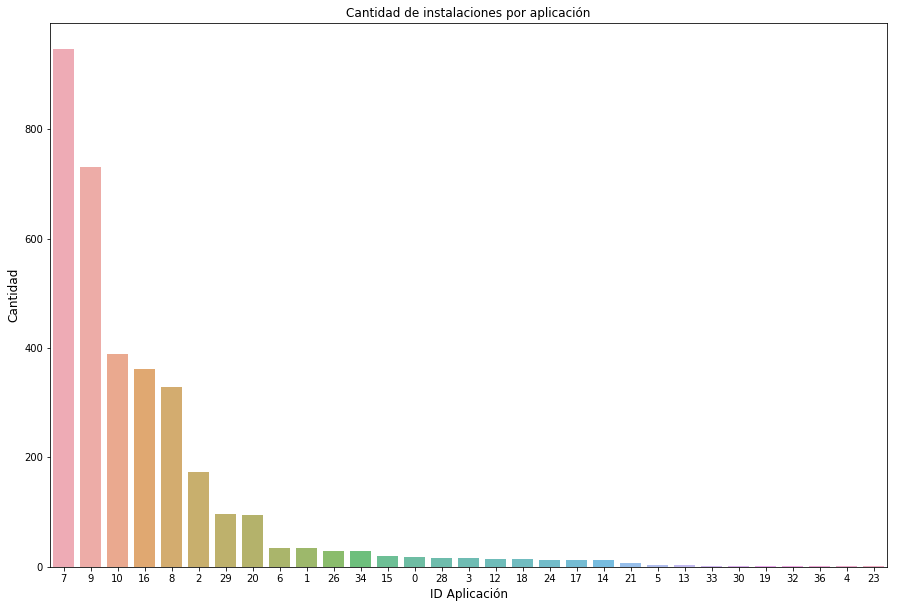

In [122]:
#Obtenemos la cantidad de instalaciones por aplicación
app_count  = df_installs['application_id'].value_counts(sort=True).reset_index().sort_values(['application_id'],ascending=False)

plt.figure(figsize=(15,10))
ax = sns.barplot(app_count.index, app_count.application_id, alpha=0.8)
ax.set_xticklabels(app_count['index'])
plt.title('Cantidad de instalaciones por aplicación')
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('ID Aplicación', fontsize=12)
plt.show()

In [123]:
app_count

,index,application_id
0,7,947
1,9,731
2,10,389
3,16,362
4,8,328
5,2,174
6,29,97
7,20,95
8,6,35
9,1,34


Las aplicaciones 7 y 9 le sacan ventaja a las demás respecto a instalaciones

         dia  cantidad
7 2019-03-05       337
8 2019-03-06       325
2 2019-03-07       393
5 2019-03-08       366
4 2019-03-09       368
6 2019-03-10       351
3 2019-03-11       377
0 2019-03-12       472
1 2019-03-13       423


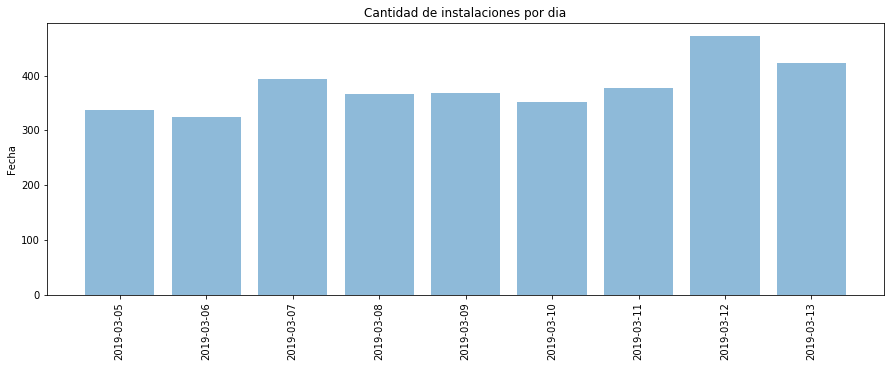

In [124]:
#Convertimos el campo created a datetime.

df_installs.created = pd.to_datetime(df_installs.created)

#Obtenemos las instalaciones por dia y hora.

df_installs_por_dia = df_installs.created\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

print(df_installs_por_dia)
plt.figure(figsize=(15,5))
plt.bar(np.arange(len(df_installs_por_dia)), df_installs_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_installs_por_dia)), df_installs_por_dia.dia.dt.date,rotation=90)
plt.ylabel('Instalaciones')
plt.ylabel('Fecha')
plt.title('Cantidad de instalaciones por dia')
 
plt.show()


    hora  cantidad
8      1       191
11     2       174
16     3       115
17     4        76
19     5        38
23     6        18
22     7        21
20     8        28
21     9        27
18    10        63
15    11       116
14    12       130
13    13       169
5     14       201
2     15       220
10    16       186
0     17       233
12    18       170
4     19       211
9     20       188
6     21       198
1     22       229
3     23       212
7     24       198


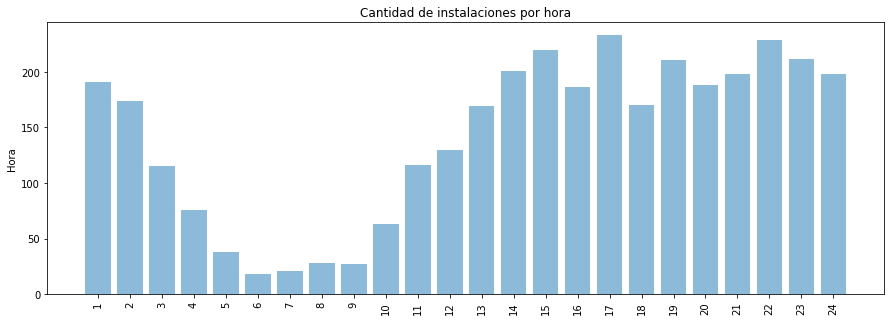

In [125]:

#Generamos una columna con la hora de la instalación
df_installs['hour'] = df_installs.created.dt.hour
df_installs['hour'] = df_installs['hour'].replace(0,24)

df_installs_por_hora = df_installs.hour\
       .value_counts()\
       .rename_axis('hora')\
       .reset_index(name='cantidad')\
       .sort_values(by='hora', ascending=True)

print(df_installs_por_hora)
plt.figure(figsize=(15,5))
plt.bar(np.arange(len(df_installs_por_hora)), df_installs_por_hora.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_installs_por_hora)), df_installs_por_hora.hora,rotation=90)
plt.ylabel('Instalaciones')
plt.ylabel('Hora')
plt.title('Cantidad de instalaciones por hora')
 
plt.show()

La cantidad de instalaciones por día se mantiene constante durante todos los dias de la muestra. Sin embargo, se puede observar que la mayor cantidad de instalaciones se producen en dos rangos de horarios : entre las 14 y 17 hs, y luego entre las 22 y 00 hs.

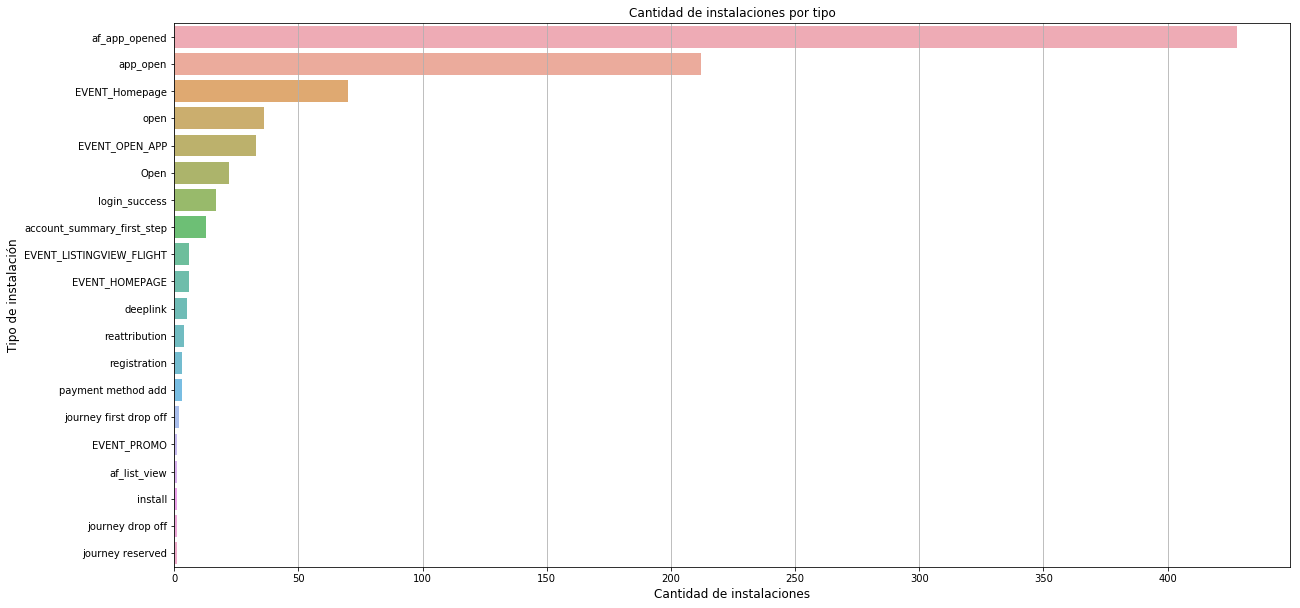

In [126]:
installs_by_kind = df_installs.kind.value_counts(sort=True)\
       .reset_index()\
       .sort_values(['kind'], ascending=False)

plt.figure(figsize=(20,10))
ax=sns.barplot(installs_by_kind.kind, installs_by_kind.index, alpha=0.8, orient='h')
ax.set_yticklabels(installs_by_kind['index'])
ax.grid(axis='x')
plt.title('Cantidad de instalaciones por tipo')
plt.ylabel('Tipo de instalación', fontsize=12)
plt.xlabel('Cantidad de instalaciones', fontsize=12)
plt.show()

In [127]:
installs_by_kind

,index,kind
0,af_app_opened,428
1,app_open,212
2,EVENT_Homepage,70
3,open,36
4,EVENT_OPEN_APP,33
5,Open,22
6,login_success,17
7,account_summary_first_step,13
8,EVENT_LISTINGVIEW_FLIGHT,6
9,EVENT_HOMEPAGE,6


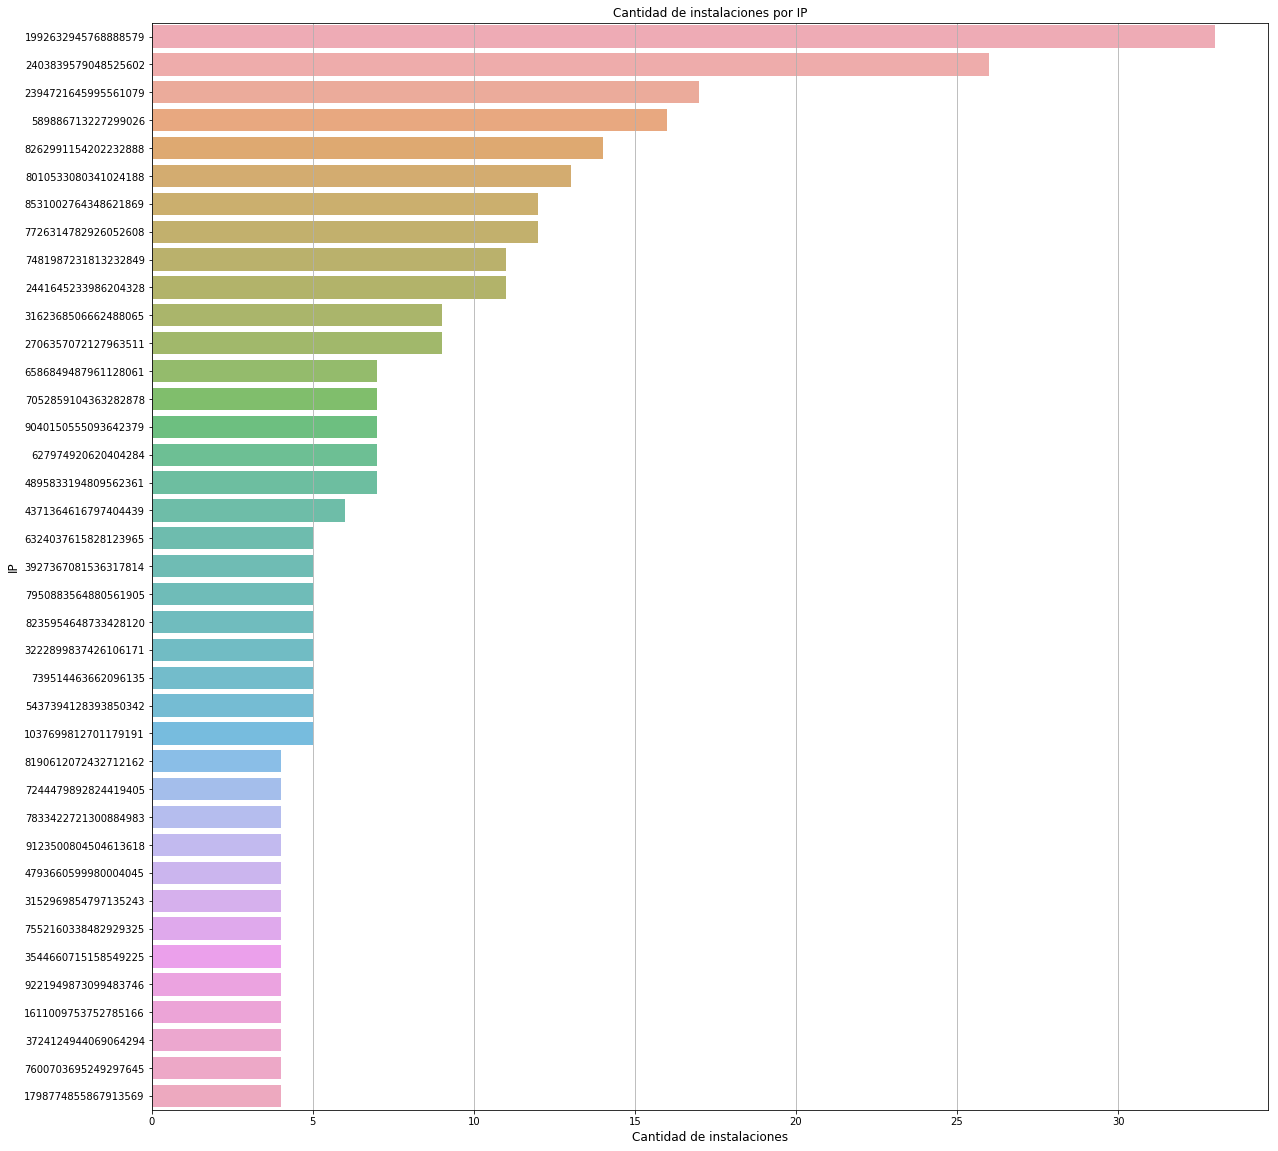

In [128]:
#Obtenemos el top 30 de cantidad de eventos por IP
installs_by_ip_address = df_installs.ip_address.value_counts(sort=True)\
       .reset_index()\
       .sort_values(['ip_address'], ascending=False)

installs_by_ip_address = installs_by_ip_address.loc[:30,]

plt.figure(figsize=(20,20))
ax=sns.barplot(installs_by_ip_address.ip_address, installs_by_ip_address.index, alpha=0.8, orient='h')
ax.set_yticklabels(installs_by_ip_address['index'])
ax.grid(axis='x')
plt.title('Cantidad de instalaciones por IP')
plt.ylabel('IP', fontsize=12)
plt.xlabel('Cantidad de instalaciones', fontsize=12)
plt.show()

In [129]:
installs_by_ip_address

,index,ip_address
0,1992632945768888579,33
1,2403839579048525602,26
2,2394721645995561079,17
3,589886713227299026,16
4,8262991154202232888,14
5,8010533080341024188,13
6,8531002764348621869,12
7,7726314782926052608,12
8,7481987231813232849,11
9,2441645233986204328,11


Podemos ver que la IP <b>1992632945768888579</b> es la que realizó la mayor cantidad de instalaciones, y también, la que tuvo la mayor cantidad de eventos.

In [130]:
ips = pd.merge(events_by_ip_address,installs_by_ip_address,on="index")

In [131]:
ips

,index,ip_address_x,ip_address_y
0,1992632945768888579,22640,33
1,3162368506662488065,19379,9
2,7726314782926052608,17704,12
3,2394721645995561079,9777,17
4,589886713227299026,7561,16
5,7833422721300884983,7197,4
6,2403839579048525602,7100,26
7,8235954648733428120,6933,5
8,7481987231813232849,6855,11
9,8010533080341024188,6241,13


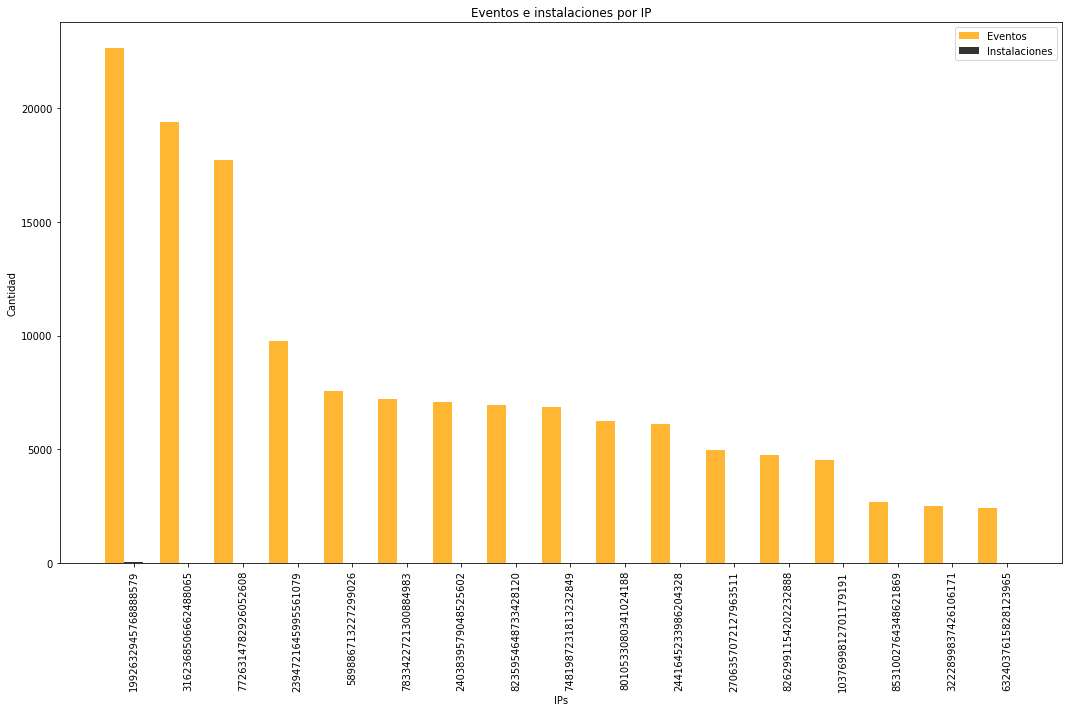

In [132]:
#Comparación de eventos e instalaciones por día.

n_groups = len(ips.index)
eventos = ips.ip_address_x
installs = ips.ip_address_y
 
# create plot
fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, eventos, bar_width,
alpha=opacity,
color='orange',
label='Eventos')
    
rects2 = plt.bar(index + bar_width, installs, bar_width,
alpha=opacity,
color='black',
label='Instalaciones')
 
plt.xlabel('IPs')
plt.ylabel('Cantidad')
plt.title('Eventos e instalaciones por IP')
plt.xticks(index + bar_width, ips['index'],rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

También podemos cuáles son las marcas en las que más aplicaciones se instalan

           brand  count
0   3.083059e+17    472
1   2.208835e+18    185
2   2.523246e+18    116
3   5.951325e+18     72
4   2.987569e+18     40
5   3.812621e+18     37
6   5.137992e+17     34
7   6.538562e+18     26
8   3.228516e+18      9
9   1.083369e+18      9
10  4.371308e+18      7
11  3.093166e+18      5
12  2.262848e+18      5
14  3.849490e+18      4
13  4.994101e+18      4
15  8.285870e+18      3
16  3.742387e+18      3
17  5.645692e+18      3
18  8.230045e+17      3
19  6.111647e+18      3
20  9.169527e+18      1
21  5.588755e+18      1
22  3.172231e+18      1
23  5.189983e+18      1
24  3.624089e+18      1
25  7.855186e+18      1
26  2.748831e+18      1


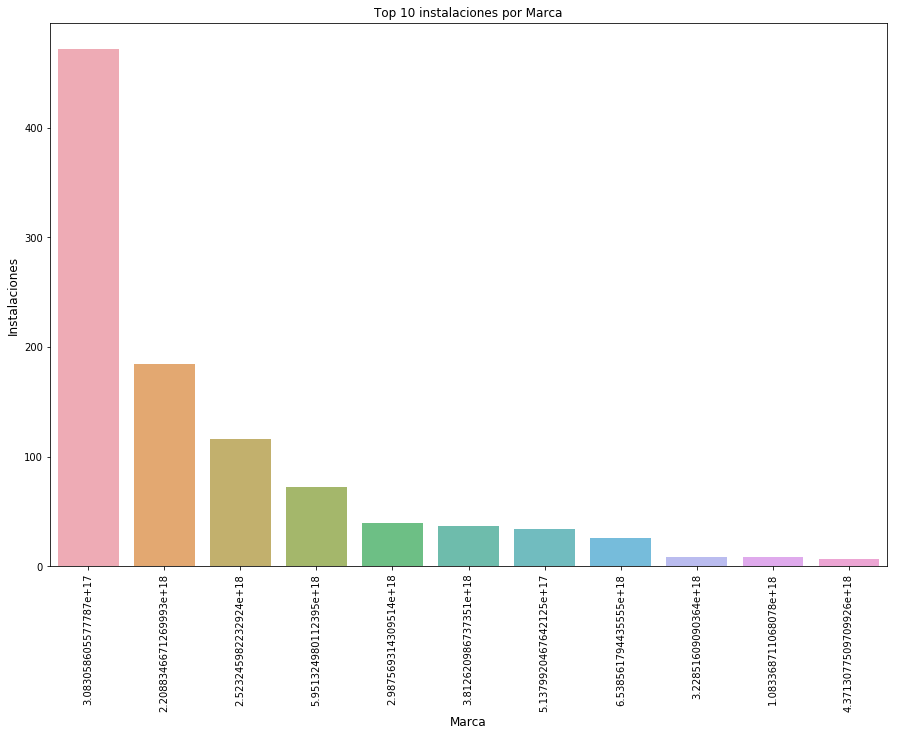

In [133]:
#Nos quedamos solo con el top 10 de marcas en las cuales se realizaron más instalaciones.
installs_by_brand = df_installs.device_brand.value_counts(sort=True).reset_index().sort_values(['device_brand'], ascending=False)
print(installs_by_brand.rename(columns = {'index':'brand','device_brand':'count'}))
installs_by_brand = installs_by_brand.loc[:10,]
plt.figure(figsize=(15,10))
ax=sns.barplot(installs_by_brand.index, installs_by_brand.device_brand, alpha=0.8)
ax.set_xticklabels(installs_by_brand['index'])
plt.title('Top 10 instalaciones por Marca')
plt.ylabel('Instalaciones', fontsize=12)
plt.xlabel('Marca', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<H1 align="center">Dataset Auctions</H1><br>

In [134]:
#Analizamos el archivo de auctions.csv
df_auctions.head(3)

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0


In [41]:
df_auctions.count()

auction_type_id           0
country            19571319
date               19571319
device_id          19571319
platform           19571319
ref_type_id        19571319
source_id          19571319
dtype: int64

In [42]:
df_auctions.auction_type_id.isnull().value_counts()

True    19571319
Name: auction_type_id, dtype: int64

In [43]:
df_auctions.country.isnull().value_counts()

False    19571319
Name: country, dtype: int64

In [45]:
df_auctions.country.value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

In [46]:
df_auctions.date.isnull().value_counts()

False    19571319
Name: date, dtype: int64

In [48]:
df_auctions.device_id.isnull().value_counts()

False    19571319
Name: device_id, dtype: int64

In [49]:
df_auctions.device_id.value_counts()

633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
8963711959081981780    14362
795159065504552200     12275
6841615430383729819    12077
5384039226444052914    11632
3198179064438296471    11565
519658456951133298     10541
2435544514359302887    10274
8751190726444323885    10256
1835469468095030098    10121
1800317677967270083    10036
9027154272484048876     9958
7574657722181550308     9767
5051610571898428259     9642
320899491737875154      9388
8292793494956750501     9315
201759600719985554      9158
8021195662481548645     9128
7650408579713341483     9020
6392567838173461255     8994
1478017482044456084     8839
6203407103275384250     8823
68016455690089173       8809
8496718680483076445     8682
8491787427844905567     8513
4834359787191717922     8495
                       ...  
5751956180575781757        1
2048572451559832028        1
3744576664345883432        1
73670867056061

In [50]:
df_auctions.platform.isnull().value_counts()

False    19571319
Name: platform, dtype: int64

In [51]:
df_auctions.platform.value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [52]:
df_auctions.source_id.isnull().value_counts()

False    19571319
Name: source_id, dtype: int64

In [53]:
df_auctions.source_id.value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

A priori observamos lo siguiente: 
<ul>
<li>
auctions_type_id tiene todos los registros nulos, por lo que no nos aporta información útil.
</li>
<li>
country tiene solamente datos de un único país, por lo que lo descartaremos para los análisis.
</li>
<li>
platform contiene 2 valores y suponemos que indican si la plataforma es Android o IOS.
</li>
<li>
source_id contiene 5 códigos y los utilizaremos para hacer un ranking. 
</li>
</ul>
    

         dia  cantidad
7 2019-03-05   1182401
8 2019-03-06   1032970
6 2019-03-07   2047661
4 2019-03-08   2303002
5 2019-03-09   2074552
2 2019-03-10   2637534
3 2019-03-11   2574916
1 2019-03-12   2779910
0 2019-03-13   2938373


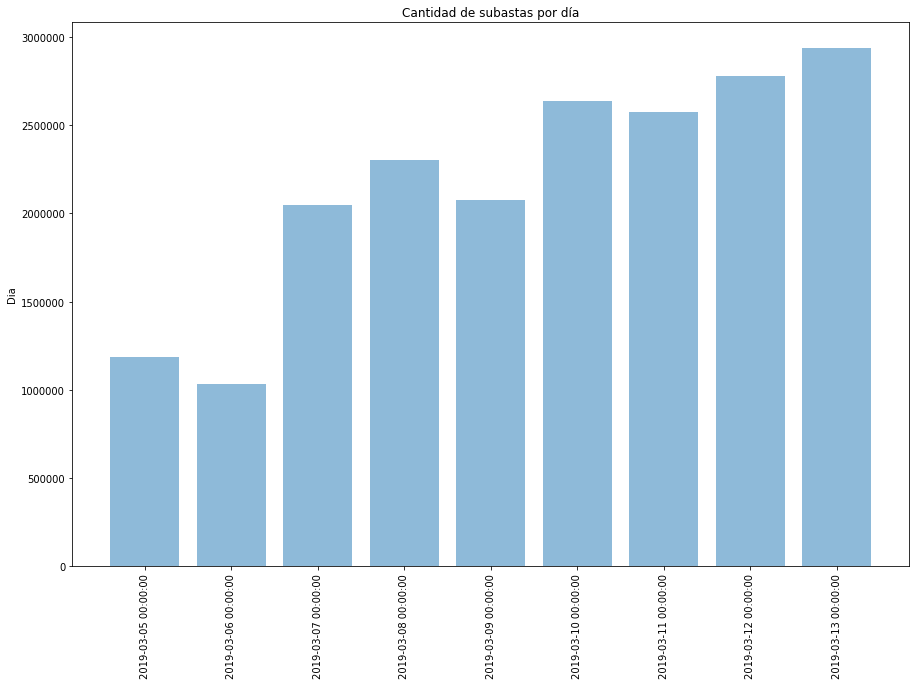

In [56]:
#Convertimos el campo date a datetime.
df_auctions.date = pd.to_datetime(df_auctions.date)
df_auctions_por_dia = df_auctions.date\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

print(df_auctions_por_dia)
plt.figure(figsize=(15,10))
plt.bar(np.arange(len(df_auctions_por_dia)), df_auctions_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_auctions_por_dia)), df_auctions_por_dia.dia,rotation=90)
plt.ylabel('Subastas')
plt.ylabel('Dia')
plt.title('Cantidad de subastas por día')
 
plt.show()

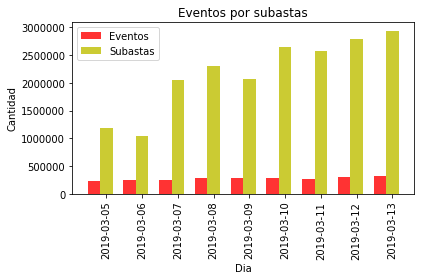

In [143]:
#Comparación de subastas y eventos por día.

n_groups = 9
eventos = df_eventos_por_dia.cantidad
subastas = df_auctions_por_dia.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, eventos, bar_width,
alpha=opacity,
color='r',
label='Eventos')
    
rects2 = plt.bar(index + bar_width, subastas, bar_width,
alpha=opacity,
color='y',
label='Subastas')

plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.title('Eventos por subastas')
plt.xticks(index + bar_width, df_eventos_por_dia.dia.dt.date,rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

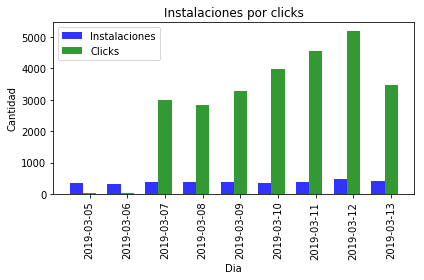

In [145]:
n_groups = 9
clicks = df_clicks_por_dia.cantidad
instalaciones = df_installs_por_dia.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, instalaciones, bar_width,
alpha=opacity,
color='b',
label='Instalaciones')
 
rects2 = plt.bar(index + bar_width, clicks, bar_width,
alpha=opacity,
color='g',
label='Clicks')
 
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.title('Instalaciones por clicks')
plt.xticks(index + bar_width, df_installs_por_dia.dia.dt.date,rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

¿Cuántas subastas terminan en instalaciones y cuàntas en solamente clicks?

c:\users\rmansilla\downloads\portable python 3.7.0 x64\app\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


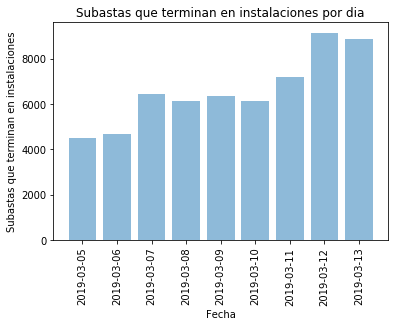

In [148]:


auctions_to_installs= df_auctions[df_auctions.device_id.isin(df_installs["ref_hash"])]
auctions_to_installs['datePart'] = auctions_to_installs.date.dt.floor('d')
auctions_to_installs_per_day = auctions_to_installs.datePart.value_counts().rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

plt.bar(np.arange(len(auctions_to_installs_per_day)), auctions_to_installs_per_day.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(auctions_to_installs_per_day)), auctions_to_installs_per_day.dia.dt.date,rotation=90)
plt.ylabel('Subastas que terminan en instalaciones')
plt.xlabel('Fecha')
plt.title('Subastas que terminan en instalaciones por dia')
 
plt.show()


c:\users\rmansilla\downloads\portable python 3.7.0 x64\app\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


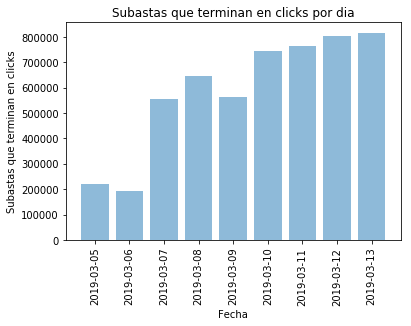

In [149]:
auctions_to_clicks = df_auctions[df_auctions.device_id.isin(df_clicks["ref_hash"])]
auctions_to_clicks['datePart'] = auctions_to_clicks.date.dt.floor('d')
auctions_to_clicks_per_day = auctions_to_clicks.datePart.value_counts().rename_axis('dia')\
       .reset_index(name='cantidad')\
       .sort_values(by='dia', ascending=True)

plt.bar(np.arange(len(auctions_to_clicks_per_day)), auctions_to_clicks_per_day.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(auctions_to_clicks_per_day)), auctions_to_clicks_per_day.dia.dt.date,rotation=90)
plt.ylabel('Subastas que terminan en clicks')
plt.xlabel('Fecha')
plt.title('Subastas que terminan en clicks por dia')
 
plt.show()

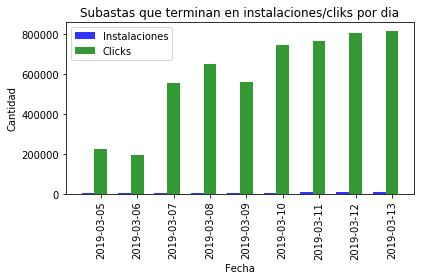

In [150]:
n_groups = 9
clicks = auctions_to_clicks_per_day.cantidad
instalaciones = auctions_to_installs_per_day.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, instalaciones, bar_width,
alpha=opacity,
color='b',
label='Instalaciones')
 
rects2 = plt.bar(index + bar_width, clicks, bar_width,
alpha=opacity,
color='g',
label='Clicks')
 
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Subastas que terminan en instalaciones/cliks por dia')
plt.xticks(index + bar_width, auctions_to_installs_per_day.dia.dt.date,rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

Por lo que podemos observar, el 27,1% de las subastas realizadas terminan en clicks pero sólo el 0.3% de las mismas terminan en instalaciones.

¿Sobre qué plataforma se realizan más subastas?

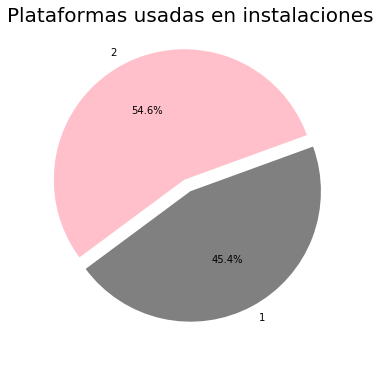

In [41]:
#preguntar si 1 seria ios o android.
sizes = auctions_to_installs.platform.value_counts()
nombres = ['2', '1']

plt.figure(figsize=(6, 6))
plt.title('Plataformas usadas en instalaciones', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['pink', 'grey'], explode=(0.1, 0))
plt.show()

Si bien es bastante parejo, se puede ver que la plataforma 2 le saca ventaja en cuanto a mayor % de subastas mostradas.

¿Cuál es la distribución de tipos de clicks

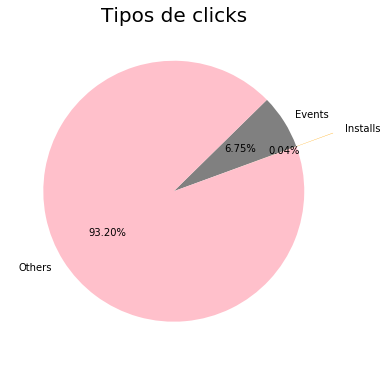

In [153]:
#Tipos de clicks
clicks_to_installs = df_clicks[df_clicks.ref_hash.isin(df_installs["ref_hash"])]
cant_clicks_to_installs = len(clicks_to_installs.index)

clicks_to_events = df_clicks[df_clicks.ref_hash.isin(df_events["ref_hash"])]
cant_clicks_to_events = len(clicks_to_events.index)

others_clicks = len(df_clicks.index) - (cant_clicks_to_installs + cant_clicks_to_events )

sizes =[cant_clicks_to_installs,cant_clicks_to_events,others_clicks] 
nombres = ['Installs', 'Events', 'Others']

plt.figure(figsize=(6, 6))
plt.title('Tipos de clicks', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.2f%%', startangle=20, colors=['orange', 'grey','pink'], explode=(0.3,0,0))
plt.show()


¿Cuál es el % de conversión sobre eventos?

In [155]:


df_events["ref_hash"].isin(df_installs["ref_hash"]).value_counts()

False    2451949
True       42474
Name: ref_hash, dtype: int64

Observamos que el 1,7% de los eventos son instalaciones

¿Cuál es el % de subastas sobre eventos?

In [156]:
#Eventos que son subastas 1047126 (41,9%)

df_events["ref_hash"].isin(df_auctions["device_id"]).value_counts()

False    1447297
True     1047126
Name: ref_hash, dtype: int64

Observamos que el 41,9% de los eventos fueron subastas.

¿Cuál es el % de clicks que terminan en instalaciones?

In [157]:
df_clicks["ref_hash"].isin(df_installs["ref_hash"]).value_counts()

False    26340
True        11
Name: ref_hash, dtype: int64

Se puede ver que el % de Clicks que terminan en instalaciones es 0,04%

In [158]:
clicks_to_installs_by_client = clicks_to_installs.advertiser_id.value_counts().rename_axis('cliente')\
       .reset_index(name='cantidad')

In [159]:
clicks_to_installs_by_client

,cliente,cantidad
0,3,11


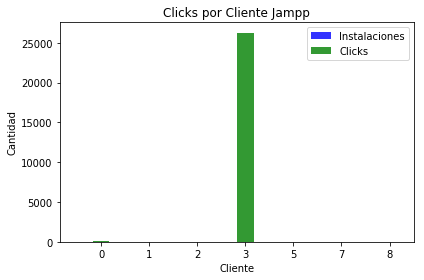

In [160]:
#VER DE MODIFICAR ESCALA PARA QUE SE NOTE MAS LAS INSTALACIONES
n_groups = 7
clicks = clicks_by_client.cantidad
instalaciones = clicks_to_installs_by_client.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, instalaciones, bar_width,
alpha=opacity,
color='b',
label='Instalaciones')
 
rects2 = plt.bar(index + bar_width, clicks, bar_width,
alpha=opacity,
color='g',
label='Clicks')
 
plt.xlabel('Cliente')
plt.ylabel('Cantidad')
plt.title('Clicks por Cliente Jampp')
plt.xticks(index + bar_width, clicks_by_client.cliente)
plt.legend()
 
plt.tight_layout()
plt.show()

Claramente vemos que el cliente que más clicks tuvo es también quien más instalaciones tuvo (solo vemos instalaciones para este cliente)

   hora  cantidad
0    17       233
    hora  cantidad
23     6        18
                 cant
date       hour      
2019-03-05 23      27
2019-03-06 21      27
           23      27
2019-03-07 17      35
2019-03-08 24      33
2019-03-09 17      28
2019-03-10 14      29
2019-03-11 22      34
2019-03-12 13      35
           23      35
2019-03-13 23      30


c:\users\rmansilla\downloads\portable python 3.7.0 x64\app\python\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


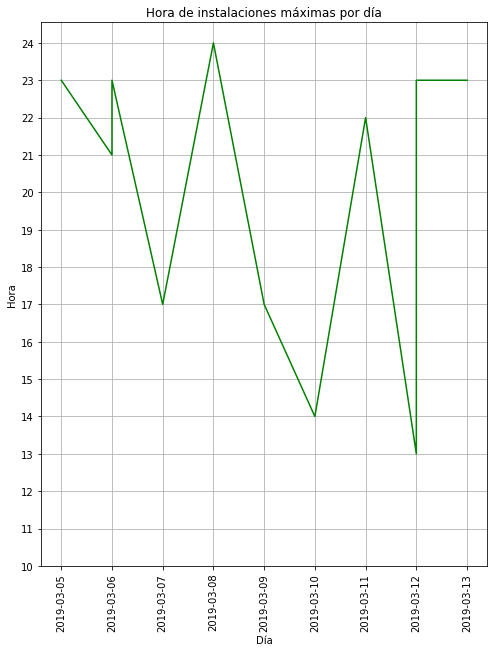

In [161]:
#Creamos una columna con el campo de fecha (sin hora)
df_installs['date'] = df_installs.created.dt.date

max_install_hour = df_installs_por_hora[df_installs_por_hora.cantidad == df_installs_por_hora.cantidad.max()]
min_install_hour = df_installs_por_hora[df_installs_por_hora.cantidad == df_installs_por_hora.cantidad.min()]

# La hora donde se produce la mayor cantidad de instalaciones es 17hs (233 installs)
print(max_install_hour)
# La hora donde se produce la menor cantidad de instalaciones es 6hs (18 installs)
print(min_install_hour)

#Agrupamos la cantidad de instalaciones por dia y hora
result = df_installs.groupby(['date','hour']).size().to_frame('cant')
idx = result.groupby(['date'])['cant'].transform(max) == result['cant']
maximos = result[idx]

print(maximos)

#Obtenemos la hora con la cantidad máxima de instalaciones por día

maximos = maximos.reset_index()
maximos.date = pd.to_datetime(maximos.date)
fig, ax = plt.subplots(figsize=(8,10))

plt.plot(maximos.date, maximos.hour, color='g')
plt.xlabel('Día')
plt.ylabel('Hora')
plt.xticks(rotation=90)
plt.yticks([10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.title('Hora de instalaciones máximas por día')
ax.grid()
plt.show()

